<a href="https://colab.research.google.com/github/nastaran-farhadi/Machine-learning-practice/blob/main/NLP%20in%20Amazon%202023%20dataset%20review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount on Google Colab:**Using  Google Colab's drive module to mount Google Drive at the directory content/gdrive'.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


**Import laibraries:**
 Importing essential Python libraries for data manipulation and visualization. "pd" is an alias for the pandas library, used for data manipulation. "np" is an alias for numpy, which handles numerical computations. "plt" is an alias for matplotlib.pyplot, enabling data visualization, including the creation of plots and charts.

In [ ]:

import pandas as pd # for data manipulation
import numpy as np # for numerical computation
import matplotlib.pyplot as plt # for data visualization

**Importing data from the JSON file:**To execute the code, users need to upload a JSON file.

In [ ]:
data = pd.read_json('/content/gdrive/MyDrive/Innovationcast/amazon.software.reviews.json.gz', lines=True)
data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,5,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
459431,2,True,"11 29, 2016",AGEWYJ2NF5C2H,B01HF41TKI,NaN,Bonita Alferes,No instructions.....No Help unless you want to...,Two Stars,1480377600,NaN,NaN
459432,1,True,"03 1, 2018",A3VCFV8WEQG9R5,B01HF3G4BS,NaN,mekonen,it's a joke,One Star,1519862400,NaN,NaN
459433,5,True,"12 2, 2017",A3DXGHJF6SOHNC,B01HF3G4BS,NaN,bbeckham,I have multiple licenses of the Antivirus. I h...,This is very effective antivirus software.,1512172800,NaN,NaN
459434,5,True,"09 15, 2018",A1WOS4D7QA06DO,B01HJAMWOK,NaN,Charles E. Potter,good value,Five Stars,1536969600,NaN,NaN


**Data Overview: Information and Descriptive Statistics**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459436 entries, 0 to 459435
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         459436 non-null  int64 
 1   verified        459436 non-null  bool  
 2   reviewTime      459436 non-null  object
 3   reviewerID      459436 non-null  object
 4   asin            459436 non-null  object
 5   style           234401 non-null  object
 6   reviewerName    459412 non-null  object
 7   reviewText      459370 non-null  object
 8   summary         459380 non-null  object
 9   unixReviewTime  459436 non-null  int64 
 10  vote            127853 non-null  object
 11  image           1508 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 39.0+ MB


In [ ]:
data.describe()

,overall,unixReviewTime
count,459436.000000,4.594360e+05
mean,3.570175,1.369691e+09
std,1.626662,1.150168e+08
min,1.000000,9.127296e+08
25%,2.000000,1.322179e+09
50%,4.000000,1.405814e+09
75%,5.000000,1.448237e+09
max,5.000000,1.538438e+09


Code shows the number of missing (null) values in each column of the DataFrame.

In [ ]:
data.isnull().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             225035
reviewerName          24
reviewText            66
summary               56
unixReviewTime         0
vote              331583
image             457928
dtype: int64

In [ ]:
data.shape

(459436, 12)

In [ ]:
data.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

**First Q:Is there a correlation between the product's rating and the review's helpfulness?**

Cleansing of data

In [ ]:
# Filling missing (NaN) values in the 'vote' column of the DataFrame data with the string '0'.
data['vote'].fillna('0', inplace=True)


In [ ]:
column_vote = data['vote'].to_numpy()

In [ ]:
#Remove commas from the values in the 'vote' column and  ensures that the 'vote' column contains numerical values in integer format.
data['vote'] = data['vote'].str.replace(',', '').astype(int)


In [ ]:
data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,0,NaN
1,4,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,0,NaN
2,1,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,5,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
459431,2,True,"11 29, 2016",AGEWYJ2NF5C2H,B01HF41TKI,NaN,Bonita Alferes,No instructions.....No Help unless you want to...,Two Stars,1480377600,0,NaN
459432,1,True,"03 1, 2018",A3VCFV8WEQG9R5,B01HF3G4BS,NaN,mekonen,it's a joke,One Star,1519862400,0,NaN
459433,5,True,"12 2, 2017",A3DXGHJF6SOHNC,B01HF3G4BS,NaN,bbeckham,I have multiple licenses of the Antivirus. I h...,This is very effective antivirus software.,1512172800,0,NaN
459434,5,True,"09 15, 2018",A1WOS4D7QA06DO,B01HJAMWOK,NaN,Charles E. Potter,good value,Five Stars,1536969600,0,NaN


In [ ]:
correlation = data['overall'].corr(data['vote'])

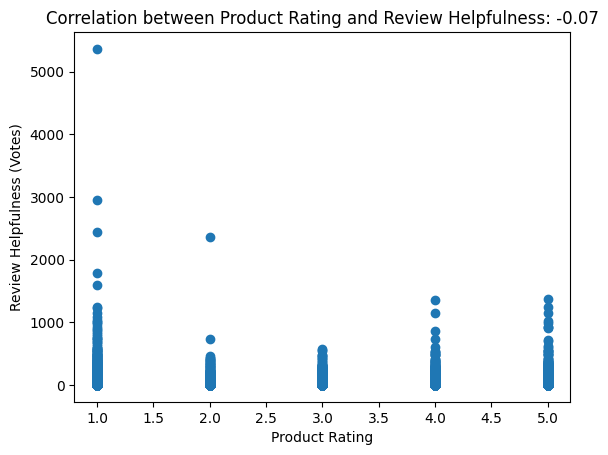

In [ ]:
plt.scatter(data['overall'], data['vote'])
plt.title(f'Correlation between Product Rating and Review Helpfulness: {correlation:.2f}')
plt.xlabel('Product Rating')
plt.ylabel('Review Helpfulness (Votes)')
plt.show()

**Result:**The result indicates that products with lower ratings receive more votes, suggesting that users find them helpful.

**First Q:**Who are the most helpful reviewers?

In [ ]:
#Group by reviewer and sum the helpful votes:Groups the DataFrame data by the 'reviewerID' column, creating a group for each unique reviewer.Within each group, it sums up the values in the 'vote' column.
reviewer_helpfulness = data.groupby('reviewerID')['vote'].sum().reset_index()

In [ ]:
most_helpful_reviewers = reviewer_helpfulness.sort_values(by='vote', ascending=False)

In [ ]:
print("Top 10 Most Helpful Reviewers:")
print(most_helpful_reviewers.head(10))

Top 10 Most Helpful Reviewers:
            reviewerID  vote
137571  A2DRURXLBMP77K  5537
63816   A1N3HHWQH225GB  2969
298790   A8DYGA3HOIKF8  2460
62870   A1MRPX3RM48T2I  2375
337363   AMA2MRO8YGGHJ  2360
113343  A250AXLRBVYKB4  2354
290855   A5JLAU2ARJ0BO  2063
135523  A2D1LPEUCTNT8X  2033
260476  A3MQAQT8C6D1I7  1846
235868   A3DQK08K169YQ  1789


**Fist Q:**	Have reviews been getting more or less helpful over time?

In [ ]:
# Convert 'unixReviewTime' to datetime
data['reviewTime'] = pd.to_datetime(data['reviewTime'], errors='coerce')

In [ ]:
data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,2014-03-11,A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,0,NaN
1,4,True,2014-02-23,A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,0,NaN
2,1,True,2014-02-17,A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3,True,2014-02-17,APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,5,False,2013-10-14,A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
459431,2,True,2016-11-29,AGEWYJ2NF5C2H,B01HF41TKI,NaN,Bonita Alferes,No instructions.....No Help unless you want to...,Two Stars,1480377600,0,NaN
459432,1,True,2018-03-01,A3VCFV8WEQG9R5,B01HF3G4BS,NaN,mekonen,it's a joke,One Star,1519862400,0,NaN
459433,5,True,2017-12-02,A3DXGHJF6SOHNC,B01HF3G4BS,NaN,bbeckham,I have multiple licenses of the Antivirus. I h...,This is very effective antivirus software.,1512172800,0,NaN
459434,5,True,2018-09-15,A1WOS4D7QA06DO,B01HJAMWOK,NaN,Charles E. Potter,good value,Five Stars,1536969600,0,NaN


In [ ]:
data['reviewTime']

0        2014-03-11
1        2014-02-23
2        2014-02-17
3        2014-02-17
4        2013-10-14
            ...    
459431   2016-11-29
459432   2018-03-01
459433   2017-12-02
459434   2018-09-15
459435   2016-10-05
Name: reviewTime, Length: 459436, dtype: datetime64[ns]

In [ ]:
# Group by review time (e.g., monthly)
data['year_month'] = data['reviewTime'].dt.to_period('M')
average_helpfulness_by_time = data.groupby('year_month')['vote'].mean()

In [ ]:
data['year_month']

0         2014-03
1         2014-02
2         2014-02
3         2014-02
4         2013-10
           ...   
459431    2016-11
459432    2018-03
459433    2017-12
459434    2018-09
459435    2016-10
Name: year_month, Length: 459436, dtype: period[M]

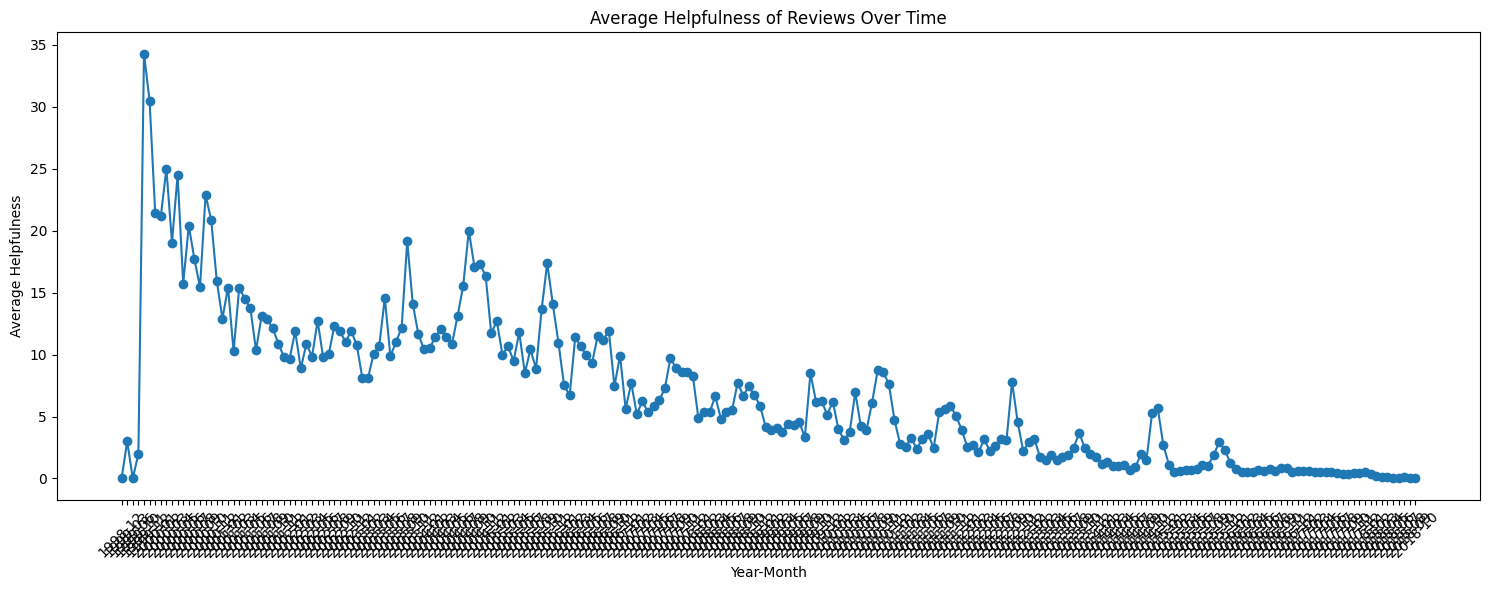

In [ ]:
# Plot the trend
plt.figure(figsize=(15, 6))
plt.plot(average_helpfulness_by_time.index.astype(str), average_helpfulness_by_time.values, marker='o')
plt.title('Average Helpfulness of Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Helpfulness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()








**Modelling:** After someone writes a review, will it be considered helpful by other users?


In [ ]:
sampling_percentage = 1
sampling_size = int(len(data) * (sampling_percentage / 100))

In [ ]:
sampled_data = data.sample(n=sampling_size, random_state=42)

In [ ]:
sampled_data.to_csv('sampled_data.csv', index=False)

In [ ]:
sampled_data = pd.read_csv('sampled_data.csv')

In [ ]:
sampled_data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,year_month
0,1,True,2016-04-30,A3K6NXE4QDCLIG,B018OJLIX6,NaN,Kent,We run a top of the line system utilizing Wind...,Does not work on Windows 10,1461974400,6,NaN,2016-04
1,5,True,2015-11-14,AXFINZCCNA8NV,B008H3SW4I,{'Format:': ' Software'},Amazon Customer,I don't really know why there were so many com...,Works well for me,1447459200,0,NaN,2015-11
2,5,True,2011-01-20,A1FWHS8Q7G8VKJ,B0039Y58YC,NaN,Solitary,I have used both WordPerfect Office and Micros...,Software is User Friendly,1295481600,0,NaN,2011-01
3,4,True,2016-09-10,A1MY6QNNH340MX,B00F3ZN2W0,NaN,Numb,"If you are buying for a build, don't be like m...",don't be like me and make sure you either have...,1473465600,0,NaN,2016-09
4,1,True,2016-03-25,A1F2KSFD73HHG6,B00001QGWI,NaN,Davis V Hill,Did not meet expectations. Too juvenile for m...,Be careful!,1458864000,0,NaN,2016-03


In [ ]:
sampled_data.shape

(4594, 13)

In [ ]:
# Create a binary label for helpfulness
threshold_votes =5  # Define a threshold for helpfulness
#set the vote threshold by considering the average helpfulness over time. Towards the end of the chart, it looks like the rating settles around 5
sampled_data['helpful'] = (sampled_data['vote'] >= threshold_votes).astype(int)




*   Removes rows with missing values in the 'reviewText' and 'overall' columns from the dataset.
*   plits the data into training and testing sets, where 'reviewText' and 'overall' are the features, and 'helpful' is the target variable.


*  Uses TF-IDF Vectorization to convert the textual data in 'reviewText' into numerical features for both the training and testing sets.
*   Concatenates the TF-IDF features with the 'overall' rating for both the training and testing sets, creating new processed datasets (X_train_processed and X_test_processed) for model training and evaluation.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

sampled_data.dropna(subset=['reviewText'], inplace=True)
sampled_data.dropna(subset=['overall'], inplace=True)


# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(sampled_data[['reviewText', 'overall']], sampled_data['helpful'], test_size=0.2, random_state=42)

# TF-IDF Vectorization of text data
vectorizer = TfidfVectorizer()
X_train_text_tfidf = vectorizer.fit_transform(X_train['reviewText'])
X_test_text_tfidf = vectorizer.transform(X_test['reviewText'])

# Concatenating TF-IDF features with overall rating for modeling
X_train_processed = pd.concat([pd.DataFrame(X_train_text_tfidf.toarray()), X_train['overall'].reset_index(drop=True)], axis=1)
X_test_processed = pd.concat([pd.DataFrame(X_test_text_tfidf.toarray()), X_test['overall'].reset_index(drop=True)], axis=1)

In [ ]:
y_train.head()

1402    0
1736    0
4438    0
3680    0
1025    0
Name: helpful, dtype: int64

In [ ]:
X_train_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,12374,12375,12376,12377,12378,12379,12380,12381,12382,overall
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
type(X_train_processed)

pandas.core.frame.DataFrame

In [ ]:
from sklearn import linear_model

X_train_processed.columns = X_train_processed.columns.astype(str)
X_test_processed.columns = X_test_processed.columns.astype(str)
model = linear_model.LinearRegression()
model.fit(X_train_processed, y_train)




LinearRegression()

In [ ]:
# Predictions
y_pred=model.predict(X_test_processed)



In [ ]:
from sklearn.metrics import r2_score
print("r2_score" , r2_score(y_pred,y_test))

r2_score -0.0035673359084518186
